#***Análise de Dados da WEB (JSON) - Data Analysis from WEB (JSON)***
---

Vamos simular um modelo de consumo de dados via URL em formato JSON e na sequencia armazenando em um DataFrame

Let´s simulation a Data consume Model from Web JSON and realizing the transformation in a DataFrame

### **Contextualização - contextualization**

Hoje vivemos em um ambiente repleto de informação, e o mais complicado é, como aproveitar este universo e realizar estudos de uma maneira mais prática. Aqui temos um passo a passo de como realizar uma raspagem de dados e consequentemente estudá-las.

Today we live in an environment with a lot of information and it is actually very difficult to analyze it all. So, I'll show you a step-by-step how to data scrape and study them.

### **Bibliotecas - Libraries**

JSON/REQUESTS - Realizar leitura e importar dados no formato de dicionarios  /Read and import data in dictionary format

Pandas / Pandas-json_normalize - Para transformar dados em dataframe / To transform in dataframe

Matplotlib / wordcloud - Trazer dados Gráficos / Bring graphical data

In [144]:
#Importar bibliotecas
#Import Libs

import json
import pandas as pd
import requests
from pandas.io.json import json_normalize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Neste passo iremos  capturar os dados de uma URL, fazer a leitura em formato JSON e na sequencia transformá-los em um Dataframe

The next step we need capture the data and transform them into a Dataframe

In [145]:
url = 'https://jsonplaceholder.typicode.com/users' #Armazenado url / Store URL
request_data = requests.get(url) #Realizando requisição dos dados / Realize data request 
json_data = json.loads(request_data.content) #Carregando formato JSON / Loading JSON format

Acho importante brifar este ponto antes de continuarmos, geralmente um dicionario de dados sempre vem com um mini dicionario dentro de outras chaves , se observarmos o dado abaixo, perceba que o dado sem tratamento irá conter subitens e precisamos horizontalizar para ter acesso a todo conteudo de forma simples.

In [146]:
json_data[0] #Dados em formato JSON / Data in Json format

{'address': {'city': 'Gwenborough',
  'geo': {'lat': '-37.3159', 'lng': '81.1496'},
  'street': 'Kulas Light',
  'suite': 'Apt. 556',
  'zipcode': '92998-3874'},
 'company': {'bs': 'harness real-time e-markets',
  'catchPhrase': 'Multi-layered client-server neural-net',
  'name': 'Romaguera-Crona'},
 'email': 'Sincere@april.biz',
 'id': 1,
 'name': 'Leanne Graham',
 'phone': '1-770-736-8031 x56442',
 'username': 'Bret',
 'website': 'hildegard.org'}

In [147]:
view = pd.DataFrame(json_data) #Transformando amostra em Dataframe / Transforming sample into Dataframe
view.head()

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."


Veja que o endereço por exemplo está com um dicionario comprimido dentro e precisamos deixá-los de forma legivel em cada uma das colunas. Abaixo temos a solução bem simples

You see the address for example, exists a new dictionary and we need expande the data.

In [148]:
df = json_normalize(json_data) #expandindo dados e armazenando em um Dataframe / Expanding the data and storing to a Dataframe
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,id,name,username,email,phone,website,address.street,address.suite,address.city,address.zipcode,address.geo.lat,address.geo.lng,company.name,company.catchPhrase,company.bs
0,1,Leanne Graham,Bret,Sincere@april.biz,1-770-736-8031 x56442,hildegard.org,Kulas Light,Apt. 556,Gwenborough,92998-3874,-37.3159,81.1496,Romaguera-Crona,Multi-layered client-server neural-net,harness real-time e-markets
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,010-692-6593 x09125,anastasia.net,Victor Plains,Suite 879,Wisokyburgh,90566-7771,-43.9509,-34.4618,Deckow-Crist,Proactive didactic contingency,synergize scalable supply-chains
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,1-463-123-4447,ramiro.info,Douglas Extension,Suite 847,McKenziehaven,59590-4157,-68.6102,-47.0653,Romaguera-Jacobson,Face to face bifurcated interface,e-enable strategic applications
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,493-170-9623 x156,kale.biz,Hoeger Mall,Apt. 692,South Elvis,53919-4257,29.4572,-164.2990,Robel-Corkery,Multi-tiered zero tolerance productivity,transition cutting-edge web services
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,(254)954-1289,demarco.info,Skiles Walks,Suite 351,Roscoeview,33263,-31.8129,62.5342,Keebler LLC,User-centric fault-tolerant solution,revolutionize end-to-end systems


Perfeito, agora podemos dar continuidade nas visões! Vamos plotar um gráfico para avaliar o volume de pessoas por cidade.

Perfect, now we can go to the next step and bring other views! Let's plot a graph to assess the volume of people by city. **negrito**

Como estamos trabalhando com dados limitados, nao temos diferenças entre as cidades, mas já temos uma noção de como prosseguir.

As we are working with data, we do not have differences between cities, but we already have a sense of how to proceed.

##Continuando - Continuing

Outra coisa muito bacana que podemos fazer no momento que estamos raspando os dados, é avaliar campos de contém texto, por exemplo, queremos verificar em uma postagem, quais palavras foram mais mencionadas. 

Another very nice thing we can do when we are scraping the data, is to evaluate fields that contain text, for example, we want to check in a post, which words were most mentioned.

In [150]:
#Trazendo nova variável para exemplo / Bring the new URL to example
url2 = 'https://jsonplaceholder.typicode.com/comments'
request2 = requests.get(url2)
json_data2 = json.loads(request2.content)
df2 = pd.DataFrame(json_data2)
df2.head()

,postId,id,name,email,body
0,1,1,id labore ex et quam laborum,Eliseo@gardner.biz,laudantium enim quasi est quidem magnam volupt...
1,1,2,quo vero reiciendis velit similique earum,Jayne_Kuhic@sydney.com,est natus enim nihil est dolore omnis voluptat...
2,1,3,odio adipisci rerum aut animi,Nikita@garfield.biz,quia molestiae reprehenderit quasi aspernatur\...
3,1,4,alias odio sit,Lew@alysha.tv,non et atque\noccaecati deserunt quas accusant...
4,1,5,vero eaque aliquid doloribus et culpa,Hayden@althea.biz,harum non quasi et ratione\ntempore iure ex vo...


Aqui vamos pegar apenas a coluna "BODY" para avaliar os textos, vale lembrar que temos formas ainda mais interessantes para realizar esse tipo de trabalho , daqui damos um grande passo para analise de sentimento mas aconselho utilizarmos o próprio Spark para tal assunto mas nao abordaremos isso neste momento. Seguimos com o exmplo.

Here we'll just take the "BODY" column to evaluate the texts, it's worth remembering that we have even more interesting ways to carry out this type of work, from here we take a big step to analyze sentiment but I advise using Spark itself for this matter but we won't address it this at this time. We follow with the example.



In [163]:
#Aqui estou apenas transformando a coluna em apenas uma variavel para avaliar os textos
#Here i'm transforming all elements of column to analyze the text's

text = df2['body'].to_string(index=False).strip().replace('\n','').replace('\...',' ').replace('...',' ').replace('"\"',' ')
print(text)

laudantium enim quasi est quidem magnam volupt  est natus enim nihil est dolore omnis voluptat  quia molestiae reprehenderit quasi aspernatur  non et atque\noccaecati deserunt quas accusant  harum non quasi et ratione\ntempore iure ex vo  doloribus at sed quis culpa deserunt consectet  maiores sed dolores similique labore et invent  ut voluptatem corrupti velit\nad voluptatem ma  sapiente assumenda molestiae atque\nadipisci l  voluptate iusto quis nobis reprehenderit ipsum  ut dolorum nostrum id quia aut est\nfuga est i  expedita maiores dignissimos facilis\nipsum es  fuga eos qui dolor rerum\ninventore corporis e  vel quae voluptas qui exercitationem\nvoluptat  nihil ut voluptates blanditiis autem odio dict  iste ut laborum aliquid velit facere itaque\nq  consequatur necessitatibus totam sed sit dolor  veritatis voluptates necessitatibus maiores co  doloribus est illo sed minima aperiam\nut dign  qui harum consequatur fugiat\net eligendi perf  deleniti aut sed molestias explicabo\ncom

Agora vamos utilizar um gráfico de palavras para ter uma noção bacana das palavras que mais foram ditas.

Now lets plot a word chart to analyze most used words

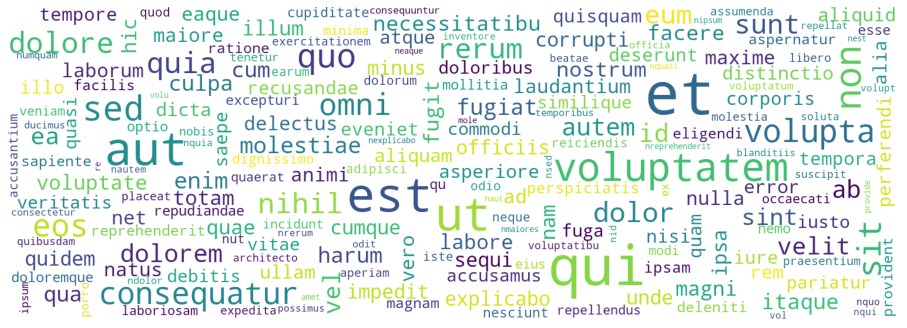

In [152]:
#plotando gráfico de palavras
#plot wordChart

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535, background_color="white").generate(text)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Conclusão - Conclusion

---

Observe que temos varias possibilidades de iniciar um trabalho de analise de dados utilizando as bibliotecas que o Python oferece e isso potencializa nosso processo de automatização e exploração dos dados disponiveis na rede!

Note that we have several possibilities to start a data analysis job using the libraries that Python offers and this enhances our process of automating and exploring the data available on the network!


Bons Estudos!

Good Studies!
